#BASEBALL PROJECT

In [1]:
!pip install plotly

In [2]:
!pip install feature_engine

In [3]:
!pip install wikipedia

In [5]:
# importing project dependencies:

# compute dependency
import numpy as np
# dataframe dependency
import pandas as pd
# visualization dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# stats dependency
from scipy import stats
# feature_engineering dependency
import feature_engine
# from scraping some data
import webbrowser
import wikipedia

import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [7]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [8]:
features = 'Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Shutouts,Saves,Errors'.split(',')
feature_dict = {}
for feat in features:

    try:
        summary = wikipedia.summary('{}'.format(feat),sentences=2)
        
    except:
        try:
          
            summary = wikipedia.summary('{} in baseball'.format(feat),sentences=2)
        except:
            wikipedia.summary('{} baseball'.format(feat),sentences=2)
    feature_dict[feat] = summary

In [9]:
feature_dict

{'Runs': 'In baseball, a run is scored when a player advances around first, second and third base and returns safely to home plate, touching the bases in that order, before three outs are recorded and all obligations to reach base safely on batted balls are met or assured. A player may score by hitting a home run or by any combination of plays that puts him safely "on base" (that is, on first, second, or third) as a runner and subsequently brings him home.',
 'At Bats': 'Bats are mammals of the order Chiroptera. With their forelimbs adapted as wings, they are the only mammals capable of true and sustained flight.',
 'Hits': "In baseball statistics, a hit (denoted by H), also called a base hit, is credited to a batter when the batter safely reaches or passes first base after hitting the ball into fair territory, without the benefit of an error or a fielder's choice.\n\n\n== Scoring a hit ==\nTo achieve a hit, the batter must reach first base before any fielder can either tag him with th

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [11]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [14]:
df.columns = ({"W":"Wins","R":"Runs","AB":"At_Bats","H":"Hits","2B":"Doubles","3B":"Triples","HR":"Homeruns","BB":"Walks","SO":"Strikeouts","SB":"Stolenbase"})

ValueError: Length mismatch: Expected axis has 17 elements, new values have 10 elements

In [15]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [16]:
df.shape

(30, 17)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [22]:
df = isnull().sum()

NameError: name 'isnull' is not defined

<AxesSubplot:>

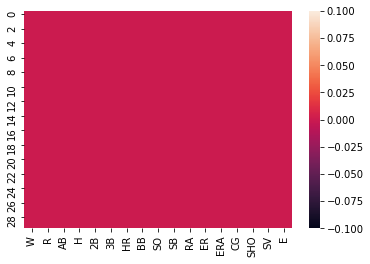

In [21]:
sns.heatmap(df.isnull())

There is no missing value in this dataset.

In [23]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

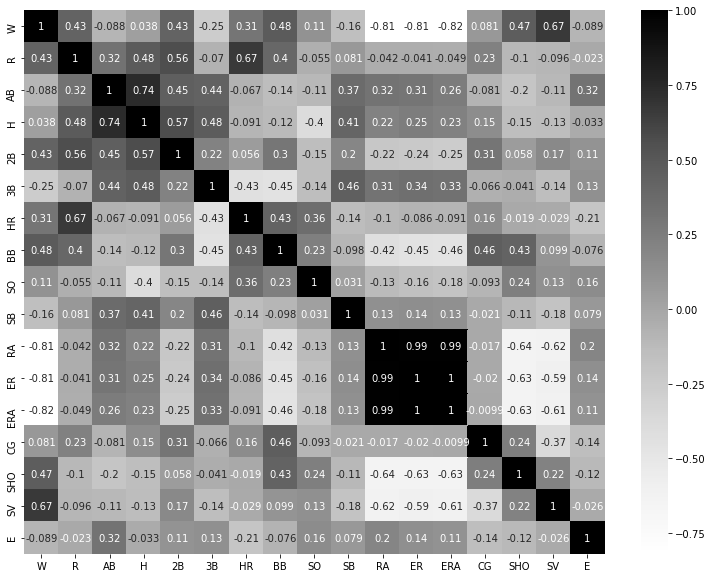

In [24]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True,cmap='Greys')

There are three highly correlated features i.e runed allowed,earned runs,earned runs average

In [25]:
df.corr()['ER']

W     -0.809435
R     -0.041245
AB     0.309686
H      0.252489
2B    -0.235531
3B     0.340225
HR    -0.085922
BB    -0.452663
SO    -0.161612
SB     0.143068
RA     0.991018
ER     1.000000
ERA    0.997248
CG    -0.020221
SHO   -0.630192
SV    -0.589663
E      0.136921
Name: ER, dtype: float64

In [26]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


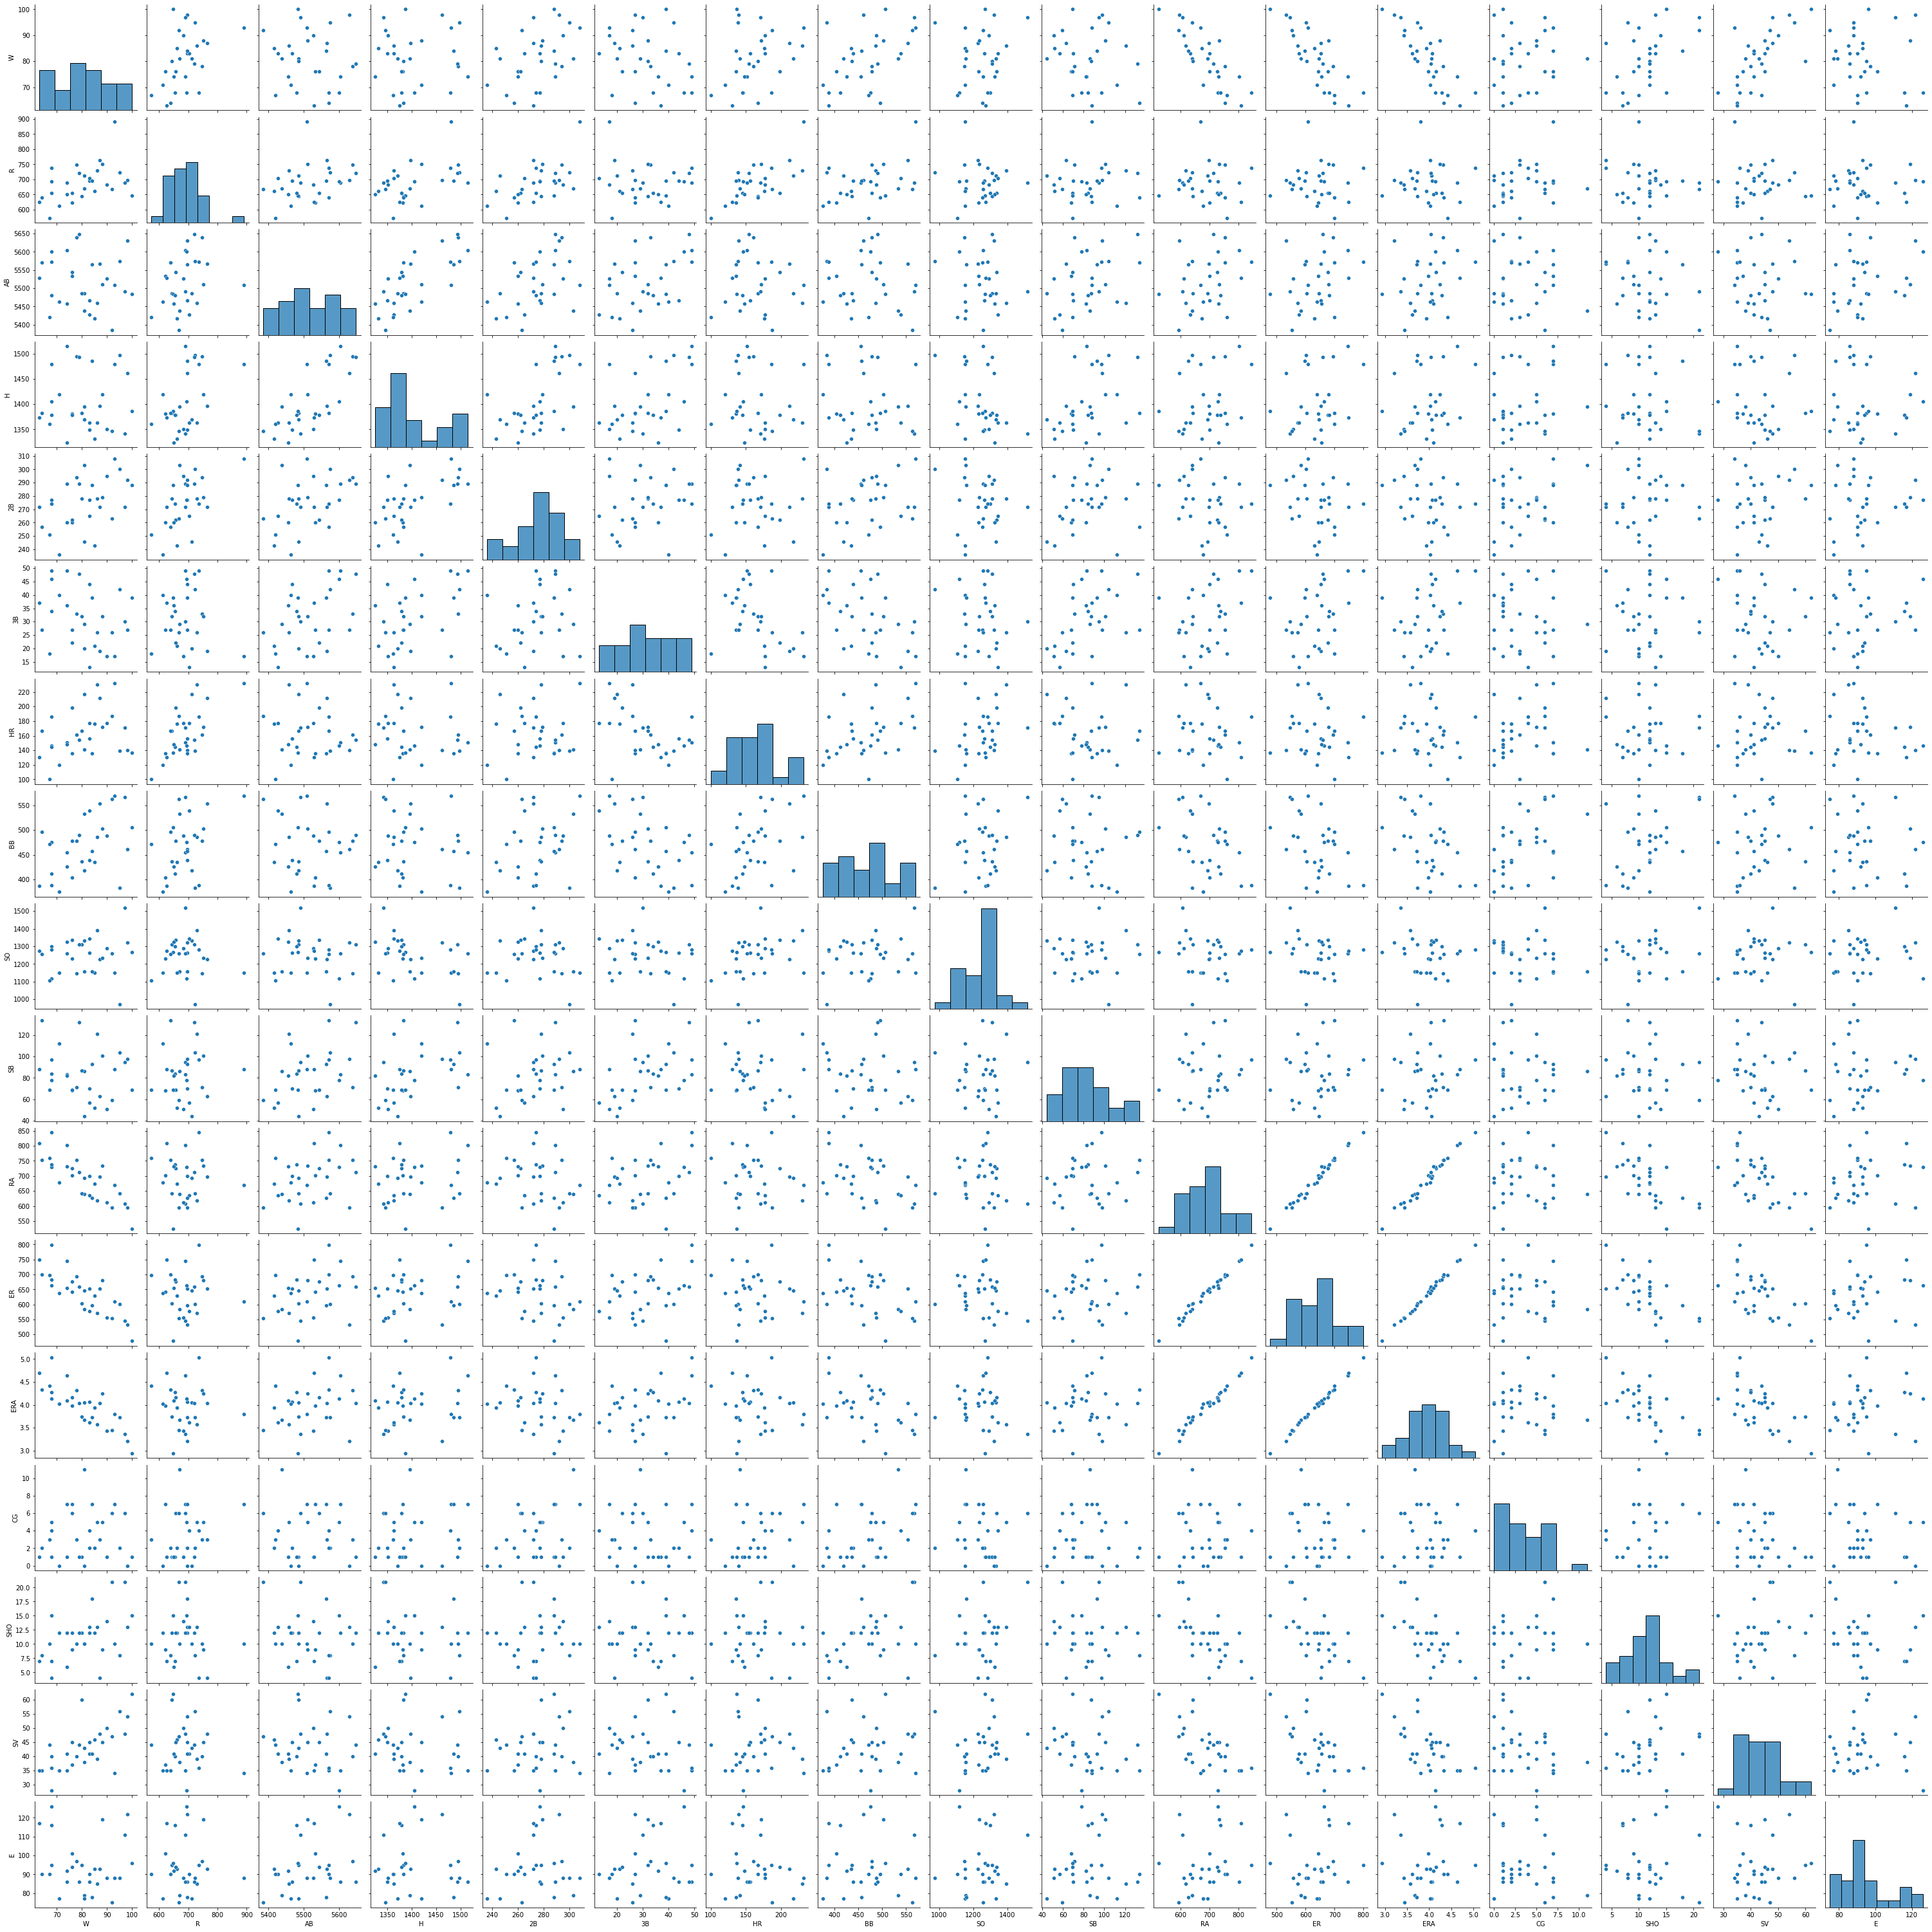

In [27]:
sns.pairplot(df,)

We have very less number of samples and there are too many numbers of features in the data. In this project we cannot add more data, so may be reduce some of the features.

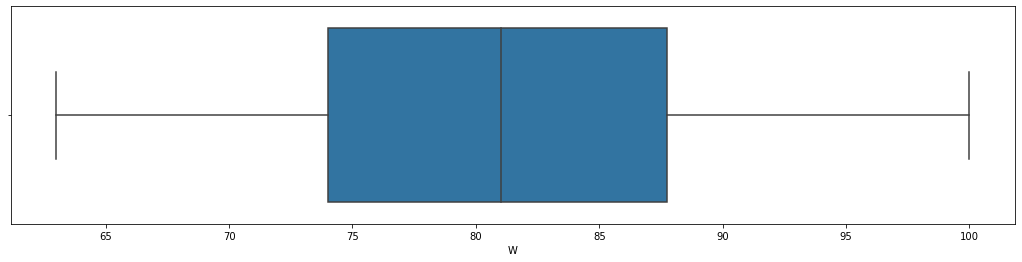

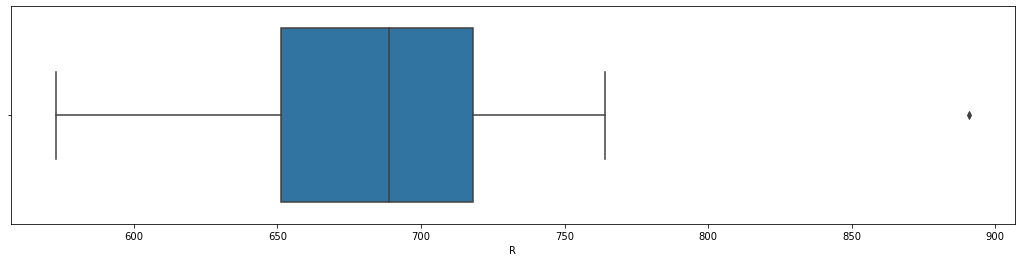

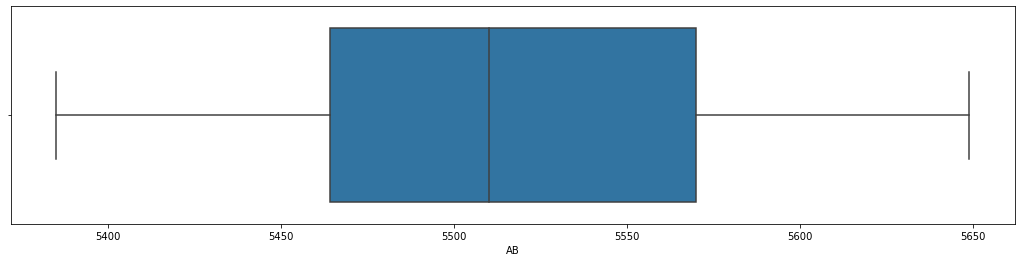

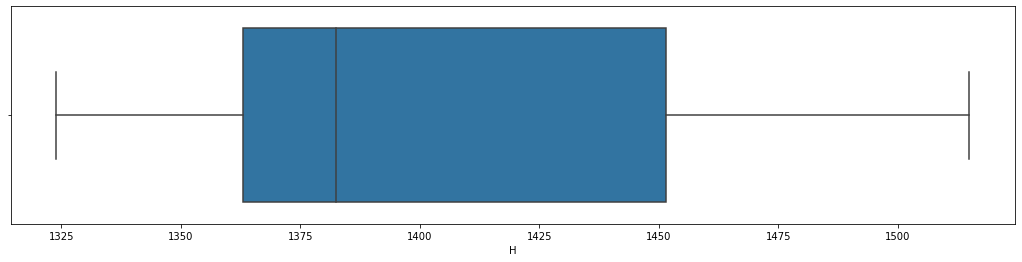

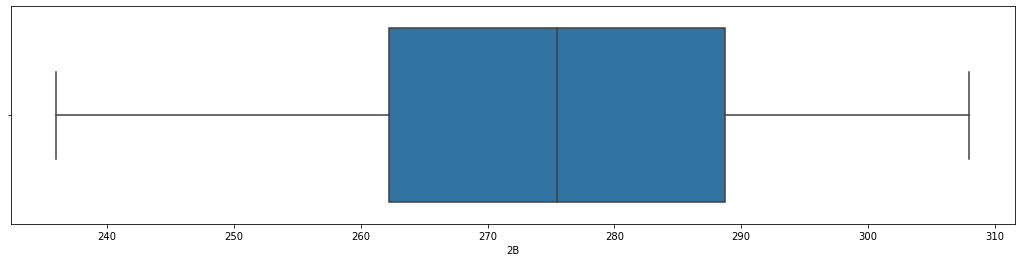

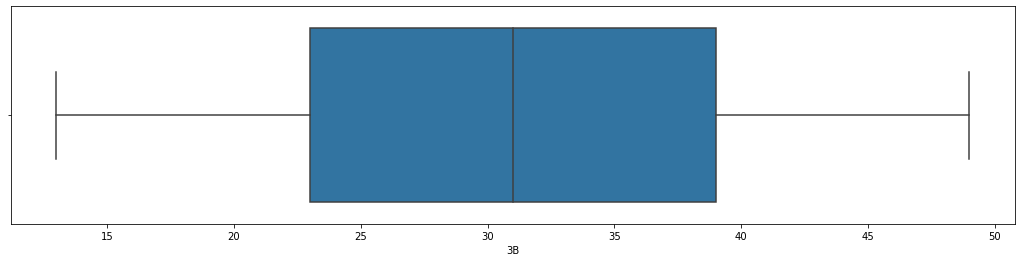

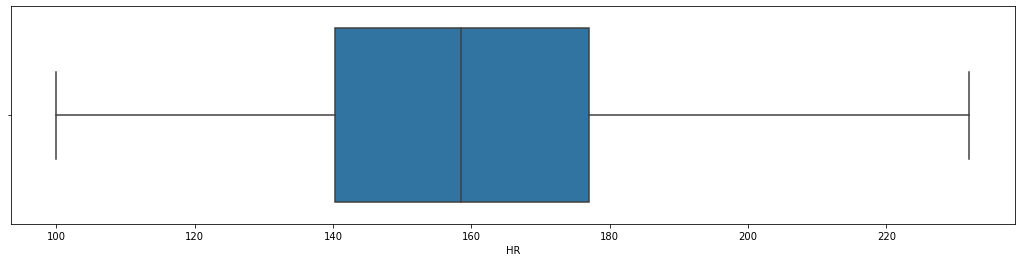

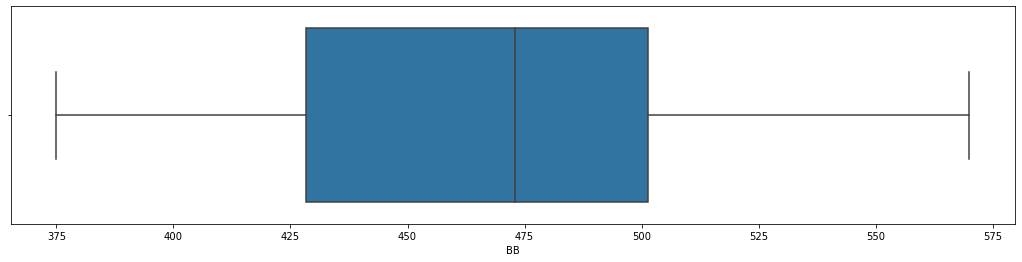

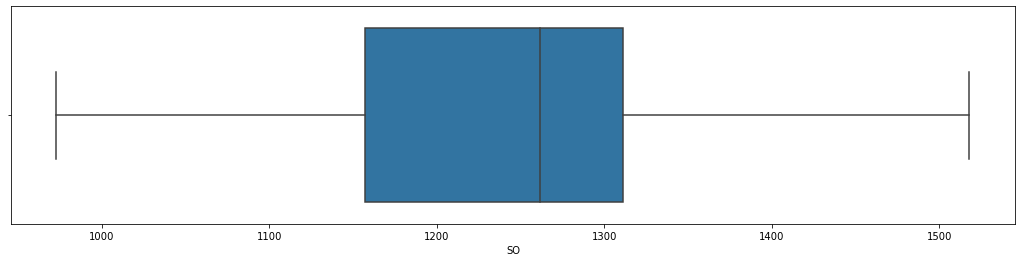

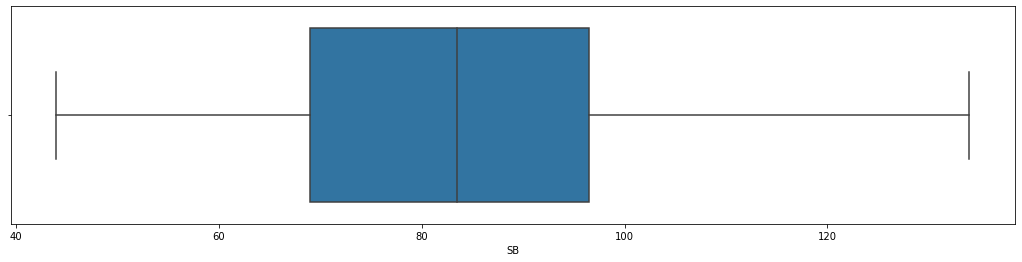

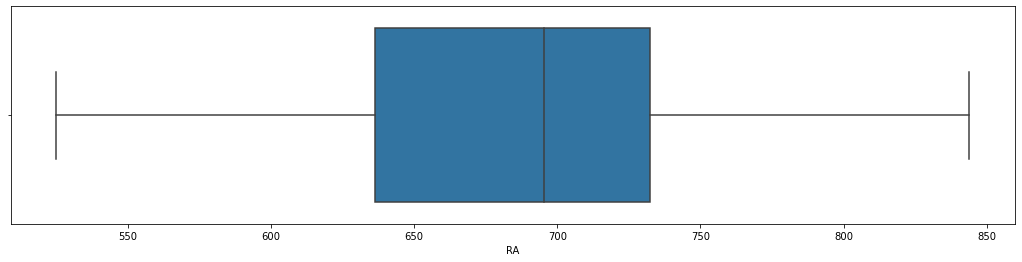

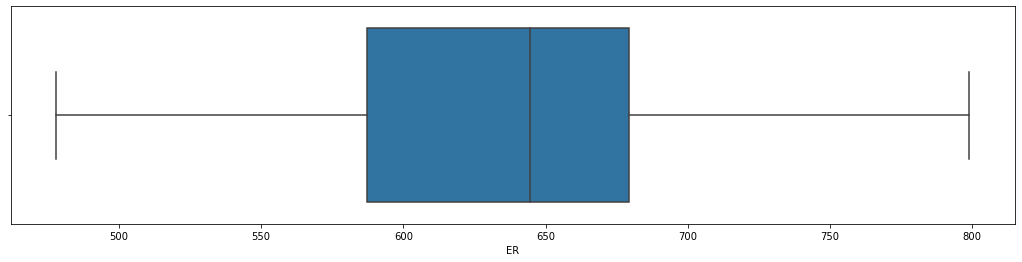

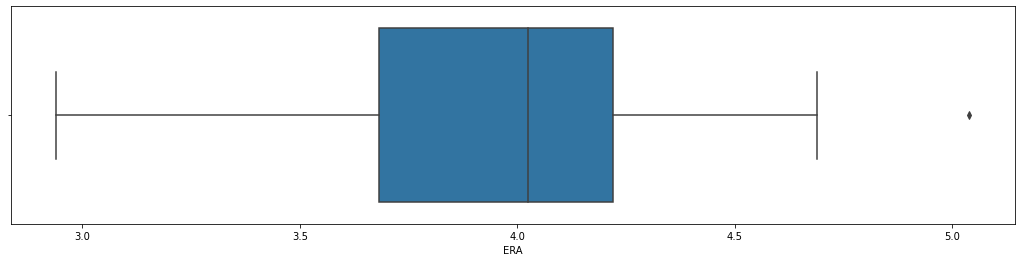

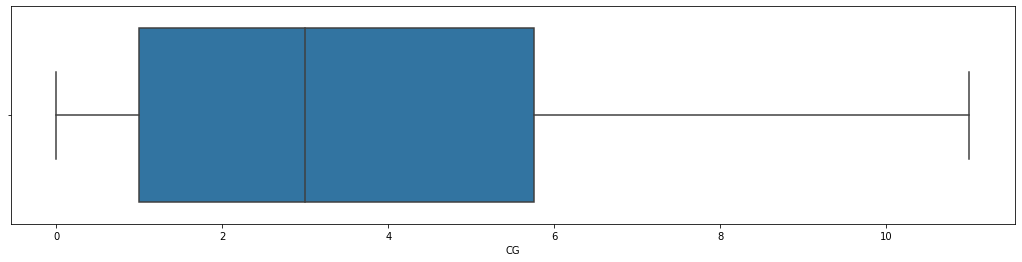

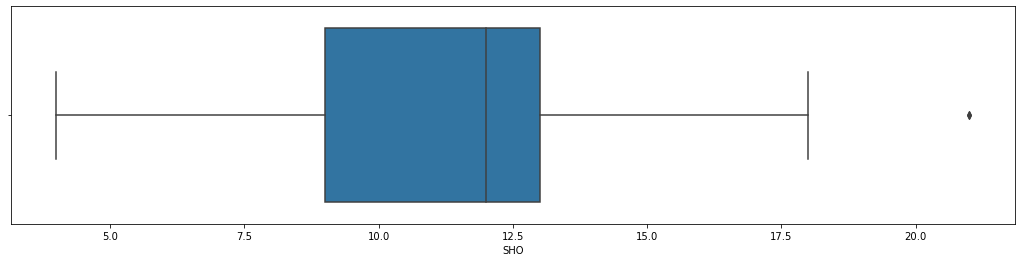

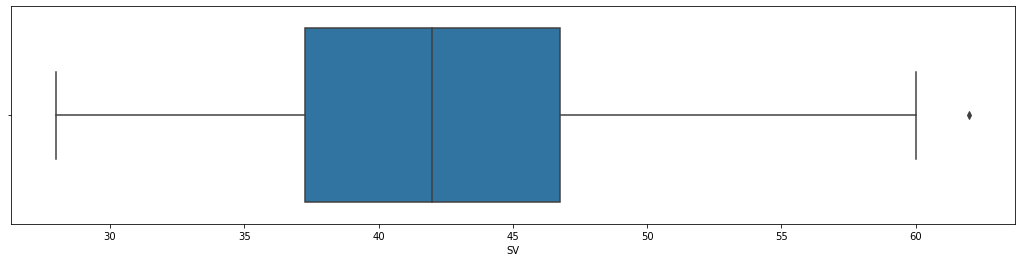

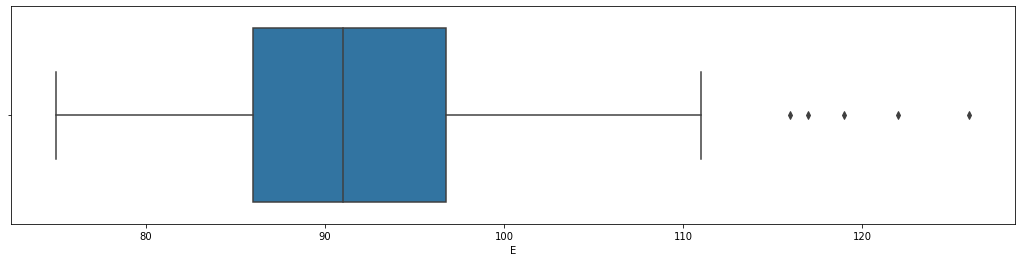

In [28]:
for col in df:
    plt.figure(figsize=(18,4))
    sns.boxplot(df[col])
    plt.show()

some of the features has outliers.

In [29]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df[~((df < (Q1 - 1.5*IQR))| (df > (Q3 + 1.5 * IQR))).any(axis=1)]

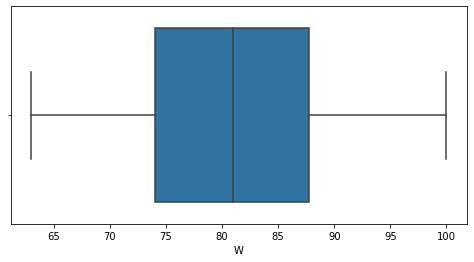

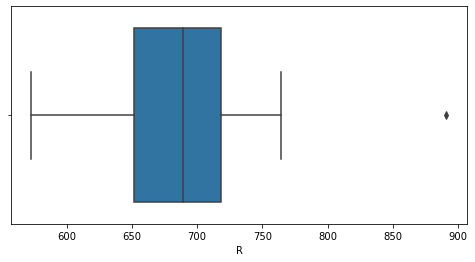

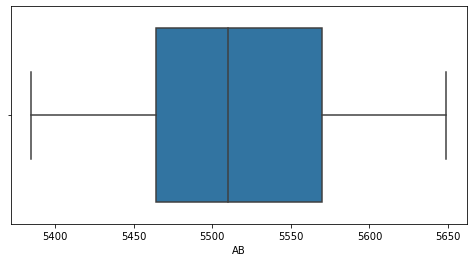

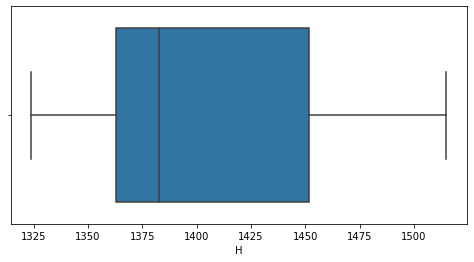

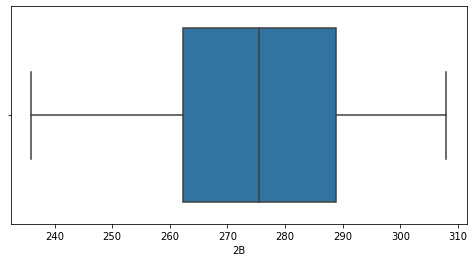

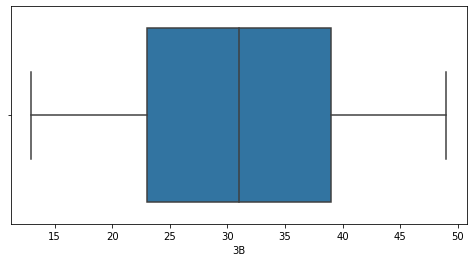

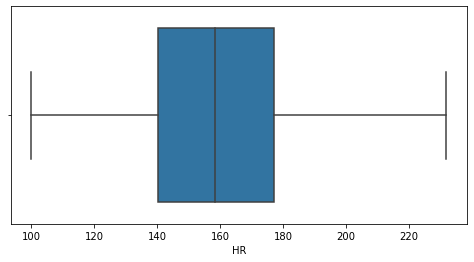

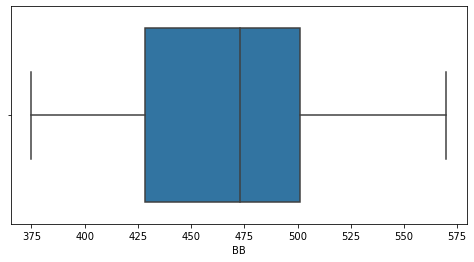

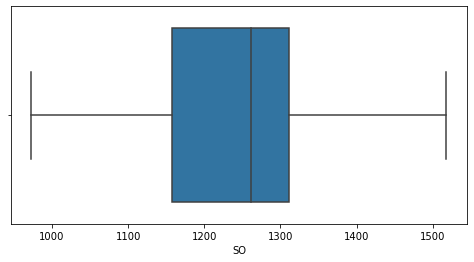

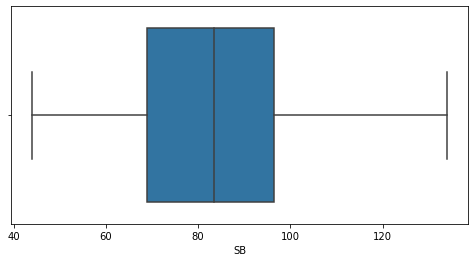

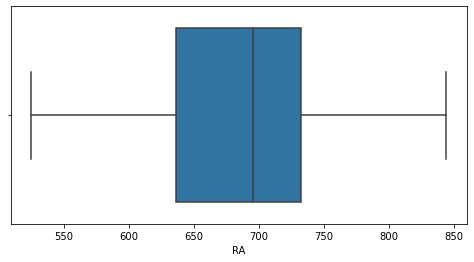

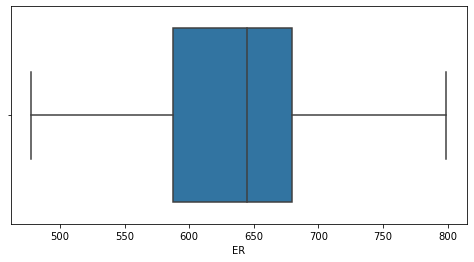

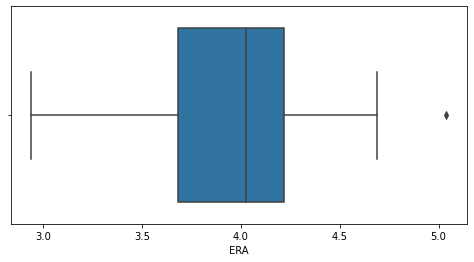

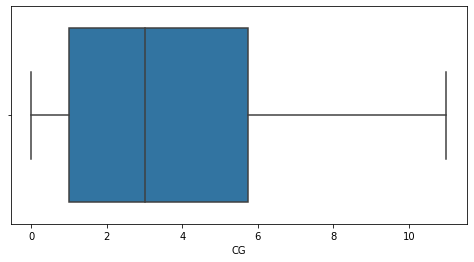

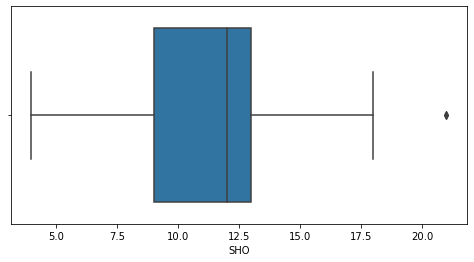

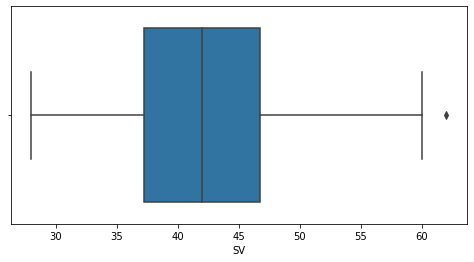

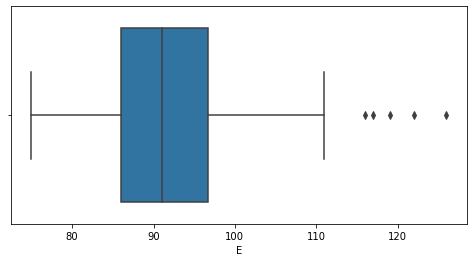

In [30]:
for col in df:
    fig = plt.figure(figsize=(18,4))
    
    fig.add_subplot(121)
    sns.boxplot(df[col])
    plt.show()

In [31]:
len(df),len(df_cleaned)

(30, 20)

When we are removing outliers from the data we are removing 1/3 percentage of data. This is not acceptable, so we keep it.

In [33]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [34]:
np.log(df+1).skew()

W     -0.165050
R      0.744813
AB     0.161062
H      0.628584
2B    -0.375085
3B    -0.418009
HR    -0.009528
BB    -0.051289
SO    -0.540637
SB    -0.160463
RA    -0.241950
ER    -0.278793
ERA   -0.243088
CG    -0.325962
SHO   -0.589640
SV     0.163057
E      0.632916
dtype: float64

In [35]:
df_cleaned = np.log(df + 1)

<AxesSubplot:>

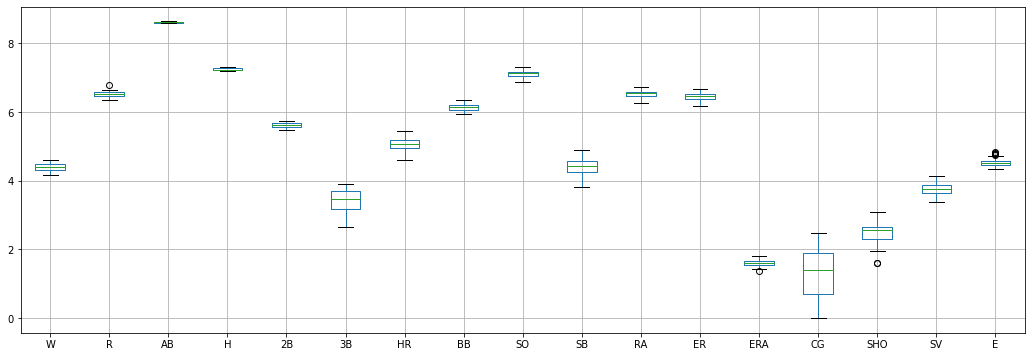

In [36]:
plt.figure(figsize=(18,6))
df_cleaned.boxplot()

In [37]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


<AxesSubplot:xlabel='R', ylabel='W'>

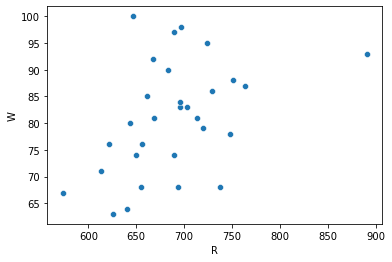

In [38]:
sns.scatterplot(df.R,df.W)

In [39]:
feature_dict['Runs']

'In baseball, a run is scored when a player advances around first, second and third base and returns safely to home plate, touching the bases in that order, before three outs are recorded and all obligations to reach base safely on batted balls are met or assured. A player may score by hitting a home run or by any combination of plays that puts him safely "on base" (that is, on first, second, or third) as a runner and subsequently brings him home.'

<AxesSubplot:xlabel='E', ylabel='W'>

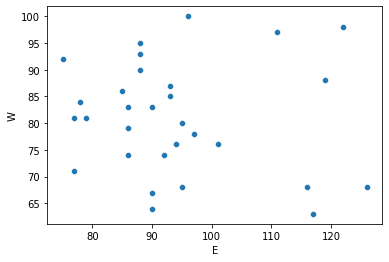

In [40]:
sns.scatterplot(df.E,df.W)

In [41]:
feature_dict['Errors']

'An error (from the Latin error, meaning "wandering") is an action which is inaccurate or incorrect. In some usages, an error is synonymous with a mistake.'

In [42]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


<AxesSubplot:xlabel='RA', ylabel='R'>

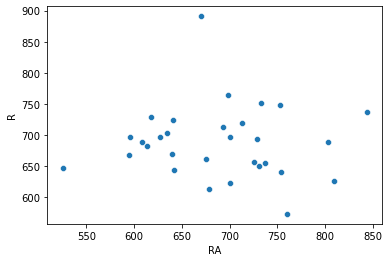

In [43]:
sns.scatterplot(df.RA,df.R)

In [44]:
df_cleaned

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,4.564348,6.586172,8.626227,7.311886,5.707110,3.761200,4.941642,5.950643,6.881411,4.653960,6.464588,6.400257,1.553925,1.098612,2.197225,4.043051,4.488636
1,4.430817,6.546785,8.606668,7.207860,5.627621,3.806662,5.056246,6.086775,7.142827,4.262680,6.552508,6.483107,1.623341,1.098612,2.564949,3.828641,4.465908
2,4.406719,6.507278,8.601534,7.241366,5.717028,3.401197,4.955827,6.280396,7.054450,4.465908,6.463029,6.371612,1.541159,2.484907,2.397895,3.663562,4.382027
3,4.343805,6.434547,8.618666,7.231287,5.564520,3.332205,4.919981,6.003887,7.116394,4.234107,6.553933,6.467699,1.605430,2.079442,2.302585,3.637586,4.624973
4,4.317488,6.536692,8.631593,7.323831,5.669881,3.912023,5.023881,6.122493,7.138867,4.430817,6.689599,6.616065,1.729884,2.079442,2.564949,3.583519,4.465908
5,4.543295,6.793466,8.614320,7.300473,5.733341,2.890372,5.451038,6.347389,7.049255,4.488636,6.508769,6.413459,1.568616,2.079442,2.397895,3.555348,4.488636
6,4.477337,6.639876,8.624791,7.242798,5.609472,2.995732,5.361292,6.318968,7.113142,4.158883,6.549651,6.481577,1.615420,1.386294,1.609438,3.891820,4.543295
7,4.406719,6.570883,8.609955,7.223296,5.509388,3.044522,5.384495,6.037871,7.194437,3.806662,6.542472,6.472346,1.619388,0.000000,2.397895,3.784190,4.356709
8,4.394449,6.469250,8.609955,7.232733,5.631212,3.496508,5.123964,6.079933,7.178545,4.477337,6.466145,6.405228,1.556037,0.693147,2.564949,4.110874,4.564348
9,4.369448,6.618739,8.637817,7.310550,5.686975,3.526361,5.087596,6.171701,7.046647,4.276666,6.625392,6.543912,1.669592,1.386294,2.397895,3.713572,4.584967


In [45]:
df_cleaned.drop(['RA','ER'],1,inplace=True)

In [46]:
X = df_cleaned.drop('W',1)
Y = df_cleaned['W']

In [47]:
X.shape,Y.shape

((30, 14), (30,))

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.22,random_state = 42)

In [49]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((23, 14), (23,), (7, 14), (7,))

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error

In [54]:
def train_n_ret_scores(model):
    model.fit(X_train,Y_train)
    
    
    y_preds = model.predict(X_test)
    print('MSE:',mean_squared_error(Y_test,y_preds))
    print('R2_Score',r2_score(Y_test,y_preds))

In [55]:
train_n_ret_scores(LinearRegression())

MSE: 0.002243332452818958
R2_Score 0.8693332554372704


In [56]:
train_n_ret_scores(Ridge(alpha=0.001))

MSE: 0.0022445413188833204
R2_Score 0.8692628429609367


In [57]:
train_n_ret_scores(Lasso(alpha=0.00003))

MSE: 0.002260698472981757
R2_Score 0.8683217418215188


In [58]:
train_n_ret_scores(ElasticNet(alpha=0.0001))

MSE: 0.0022694205406136466
R2_Score 0.8678137100396566


In [59]:
train_n_ret_scores(DecisionTreeRegressor(criterion='mse'))

MSE: 0.009516458952343576
R2_Score 0.4456975338162543


In [60]:
train_n_ret_scores(RandomForestRegressor(n_estimators=500))

MSE: 0.007089445160746198
R2_Score 0.5870631128495237


In [61]:
train_n_ret_scores(GradientBoostingRegressor())

MSE: 0.005549283266648501
R2_Score 0.6767724827418136


In [62]:
train_n_ret_scores(AdaBoostRegressor(base_estimator=LinearRegression()))

MSE: 0.003443670445381877
R2_Score 0.7994175112656613


In [63]:
models = [LinearRegression(),Ridge(alpha=0.001),Lasso(alpha=0.00003),ElasticNet(alpha=0.0001),DecisionTreeRegressor(criterion='mse'),RandomForestRegressor(n_estimators=500),GradientBoostingRegressor(),AdaBoostRegressor(base_estimator=LinearRegression())]
model_names = 'Linear Ridge Lasso ElasticNet Decision_Tree Random_Forest Gradient_Boost Ada_Boost'.split()
models_df = pd.DataFrame(columns=['Model','MSE','R2','meanCV'])
for model,model_names in zip(models,model_names):
    print(model)
    
    model.fit(X_train,Y_train)
    
    y_preds = model.predict(X_test)
    
    mse = mean_squared_error(Y_test,y_preds)
    r2 = r2_score(Y_test,y_preds)
    avgCV = np.mean(cross_val_score(model,X,Y,scoring='r2'))
    
    
    
    models_df = models_df.append({'Model':model_names,'MSE':mse,'R2':r2,'meanCV':avgCV},ignore_index=True)

LinearRegression()
Ridge(alpha=0.001)
Lasso(alpha=3e-05)
ElasticNet(alpha=0.0001)
DecisionTreeRegressor()
RandomForestRegressor(n_estimators=500)
GradientBoostingRegressor()
AdaBoostRegressor(base_estimator=LinearRegression())


In [64]:
models_df

,Model,MSE,R2,meanCV
0,Linear,0.002243,0.869333,0.497937
1,Ridge,0.002245,0.869263,0.560001
2,Lasso,0.002261,0.868322,0.597897
3,ElasticNet,0.002269,0.867814,0.589938
4,Decision_Tree,0.007079,0.587660,-2.464911
5,Random_Forest,0.007669,0.553278,-0.862774
6,Gradient_Boost,0.005221,0.695922,-1.160188
7,Ada_Boost,0.004110,0.760584,0.444452


In [65]:
best_model = Lasso(alpha=0.0001,)
best_model.fit(X_train,Y_train)

Lasso(alpha=0.0001)

In [68]:
train_n_ret_scores(Lasso(alpha=0.0001,))

MSE: 0.0022856579859010227
R2_Score 0.8668679322022921


In [71]:
np.mean(cross_val_score(best_model,X,Y))

0.5912890124743314

We go approx 60% accuracy

In [70]:
import joblib
joblib.dump(best_model,'BaseBall.pkl')

['BaseBall.pkl']